<a href="https://colab.research.google.com/github/emiliamusso/scraper/blob/main/scraper_news2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import os
import re

## Ejercicio Extra

### 1) Obtener la pagina principal
Trabajar sobre la url: https://www.bbc.com/future

Obtener los titulos y links de las noticias de la seccion Most Popular (los 9 articulos mas populares)

Extra:
- Obtener las noticias de la seccion Editor's picks y utilizarlo en la segunda parte

In [ ]:
#EXTRAER TITULOS NOTICIAS TECNOLOGÍA INFOBAE
import requests
import re

# Descargar la página web
url = 'https://www.infobae.com/tag/tecnologia/'
response = requests.get(url)
html = response.text

# Buscar los títulos de las noticias usando regex
pattern = '<h1 class="headline no-hover"><a href=".+?">(.+?)</a></h1>'
titles = re.findall(pattern, html)

# Imprimir los títulos encontrados
titles1 =[title for title in titles]
titles1

[]

In [ ]:
base_url = 'https://www.bbc.com'
page_url = 'https://www.bbc.com/future'


In [ ]:
#Obtener los titulos y links de las noticias de la seccion Most Popular (los 9 articulos mas populares) DE LA BBC
base_url = 'https://www.bbc.com'
page_url = 'https://www.bbc.com/future'

def codigo_html(url):
    headers = {
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
        }
    resp = requests.get(url, headers = headers)
    return resp.text

html_crudo = codigo_html(page_url)
soup = BeautifulSoup(html_crudo)

In [ ]:
#Obtener los titulos y links de las noticias de la seccion Most Popular (los 9 articulos mas populares) DE LA
#NUESTRA SOLUCIÓN
url = 'https://www.bbc.com/future/'

def codigo_html(url):
    headers = {
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
        }
    resp = requests.get(url, headers = headers)
    return resp.text

html_crudo = codigo_html(url)
soup = BeautifulSoup(html_crudo)

seccion_titulos = soup.find_all('div',class_='most-popular-item most-popular-item--desktop')


listado = dict()
for i in seccion_titulos:
  title = i.find_all('a')[1].text
  link = base_url + i.find_all('a')[1]['href']
  listado[title]=link

print(listado)

{'What it takes to make a suit fit for the Moon': 'https://www.bbc.com/future/article/20230418-what-it-takes-to-make-a-suit-fit-for-the-moon', 'The blind women detecting early stage breast cancer in India': 'https://www.bbc.com/future/article/20230406-the-blind-women-detecting-early-stage-breast-cancer-in-india', 'How secrets affect families': 'https://www.bbc.com/future/article/20230417-how-secrets-affect-families', 'How an objective measure of pain could counter bias in medicine': 'https://www.bbc.com/future/article/20230414-the-search-for-an-objective-measure-of-pain', 'The clean energy milestone the world is set to pass in 2023': 'https://www.bbc.com/future/article/20230414-climate-change-why-2023-is-a-clean-energy-milestone', 'Can regenerative wool make fashion more sustainable?': 'https://www.bbc.com/future/article/20230413-can-regenerative-wool-make-fashion-more-sustainable', 'What are the best lucid dreaming techniques?': 'https://www.bbc.com/future/article/20230413-what-are-th

In [ ]:
#OTRA SOLUCIÓN POSIBLE
base_url = 'https://www.bbc.com'
page_url = 'https://www.bbc.com/future'

req = requests.get(page_url)
sopa = BeautifulSoup(req.text, 'html.parser')
articles_html = sopa.findAll('div', class_='most-popular-item')
articles = [{'title': article.attrs['data-bbc-title'], 'url': base_url + article.attrs['data-bbc-result']} for article in articles_html]
articles

[{'title': 'What it takes to make a suit fit for the Moon',
  'url': 'https://www.bbc.com/future/article/20230418-what-it-takes-to-make-a-suit-fit-for-the-moon'},
 {'title': 'The blind women detecting early stage breast cancer in India',
  'url': 'https://www.bbc.com/future/article/20230406-the-blind-women-detecting-early-stage-breast-cancer-in-india'},
 {'title': 'How secrets affect families',
  'url': 'https://www.bbc.com/future/article/20230417-how-secrets-affect-families'},
 {'title': 'How an objective measure of pain could counter bias in medicine',
  'url': 'https://www.bbc.com/future/article/20230414-the-search-for-an-objective-measure-of-pain'},
 {'title': 'The clean energy milestone the world is set to pass in 2023',
  'url': 'https://www.bbc.com/future/article/20230414-climate-change-why-2023-is-a-clean-energy-milestone'},
 {'title': 'Can regenerative wool make fashion more sustainable?',
  'url': 'https://www.bbc.com/future/article/20230413-can-regenerative-wool-make-fashion

In [ ]:
#OTRA SOLUCIÓN POSIBLE
resultado = requests.get(page_url)
soup = BeautifulSoup(resultado.text, "html.parser")
lista = soup.find_all('div',class_='most-popular-item__content')

dic = {}
for elemento in lista:
  dic[elemento.find('h2').text] = base_url + elemento.find('a').attrs['href']

### 2) Obtener informacion de las noticias
Ingresar a cada noticia seleccionada en el item anterior y separar:
- Tag o categoria de la noticia
- Titulo
- Link a la imagen
- Autor/a
- Fecha
- Introduccion a la noticia

Nota:
- Crear una funcion para obtener la informacion por cada noticia.

In [ ]:
#copia de pantalla de solución charly

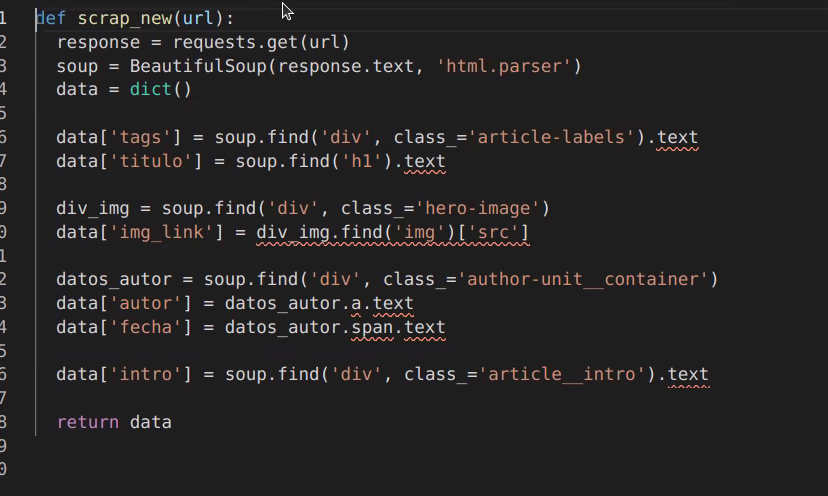

In [ ]:
def scrap_new(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  data = dict()

  data['tags'] = soup.find('div', class_='article-labels').text
  data['img_link'] = div_img.find('img')['scr']

  datos_autor = soup.find('div', class_='author-unit__container')
  data['autor'] = datos_autor.a.text
  data['fecha'] = datos_autor.span.text

  data['intro'] = soup.find('div', class_='article_intro').text

  return data

NameError: ignored